# LENET-5
This notebookL: Convolutional Neural Network in Tensorflow using the modified version of LeNet-5 with Mnist Dataset

### IMPORTS

***general imports***

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

***tensorflow imports***

In [3]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D 

### LOAD DATA

***loading dataset***

In [4]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


***checking the number/dimension of data***

In [5]:
print("Dimensions of X_train are:", X_train.shape)
print("Dimensions of y_train are:", y_train.shape)
print("Dimensions of X_valid are:", X_valid.shape)
print("Dimensions of y_valid are:", y_valid.shape)

Dimensions of X_train are: (60000, 28, 28)
Dimensions of y_train are: (60000,)
Dimensions of X_valid are: (10000, 28, 28)
Dimensions of y_valid are: (10000,)


***showing samples***

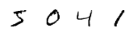

[5 0 4 1]


In [6]:
plt.figure(figsize=(2, 4))
for k in range(4):
  plt.subplot(1, 4, k+1)
  plt.imshow(X_train[k], cmap="Greys")
  plt.axis("off")

plt.tight_layout()
plt.show()


print(y_train[0:4])

### PRE-PROCESS DATA

***re-shape***

In [7]:
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32")
X_valid = X_valid.reshape(-1, 28, 28, 1).astype("float32")

X_train.shape

(60000, 28, 28, 1)

***re-scale***

In [8]:
X_train /= 255
X_valid /= 255

***onehot encoding***

In [9]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

### NEURAL NETWORK

***design neural network architecture***

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())                                                               
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))  

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

***model config***

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

***train model***

In [14]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0486 - accuracy: 0.9841 - val_loss: 0.0316 - val_accuracy: 0.9885
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0399 - accuracy: 0.9872 - val_loss: 0.0290 - val_accuracy: 0.9912
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0261 - val_accuracy: 0.9906
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0315 - accuracy: 0.9899 - val_loss: 0.0269 - val_accuracy: 0.9906
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0254 - val_accuracy: 0.9910
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0289 - val_accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0264 - val_accuracy: 0.9918

***evaluating model performance***

In [15]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.0298 - accuracy: 0.9919


[0.02975442260503769, 0.9919000267982483]